In [8]:
from data.read import read_csv
from data.train import preprocess_normalize_data, train_evaluate_linear_regression, train_evaluate_polynomial_regression, zscore_normalize, train_evaluate_zscore_normalization
import matplotlib.pyplot as plt
import numpy as np
x_features = []
data = read_csv('data/train.csv')
x_train, y_train, keys = preprocess_normalize_data(data=data, target_column='medv')
x_features = keys

LINEAR REGRESSION TRAIN SET:
MSE: 22.680459877448374
RMSE: 4.7624006422652405
MAE: 3.3054327101721324

LINEAR REGRESSION TEST SET:
MSE: 23.014234200937203
RMSE: 4.797315311811097
MAE: 3.5714776677068447


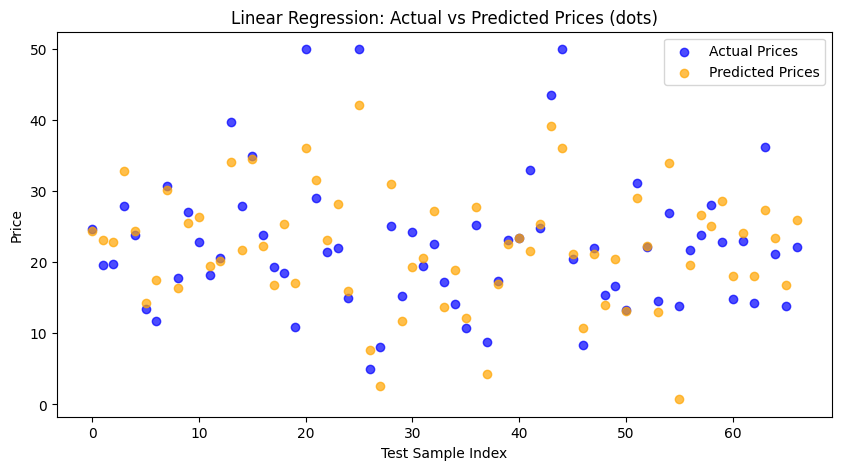

In [9]:
sgdr, X_test, y_test, y_test_pred = train_evaluate_linear_regression(x_train, y_train)
indices = np.arange(len(y_test))

plt.figure(figsize=(10,5))
plt.scatter(indices, y_test, color='blue', label='Actual Prices', alpha=0.7)
plt.scatter(indices, y_test_pred, color='orange', label='Predicted Prices', alpha=0.7)
plt.xlabel("Test Sample Index")
plt.ylabel("Price")
plt.title("Linear Regression: Actual vs Predicted Prices (dots)")
plt.legend()
plt.show()


POLYNOMIAL REGRESSION TRAIN SET:
MSE: 11.002891218260086
RMSE: 3.317060629271055
MAE: 2.3540570043077187

POLYNOMIAL REGRESSION TEST SET:
MSE: 14.096364979973874
RMSE: 3.754512615503359
MAE: 2.7587279082000147


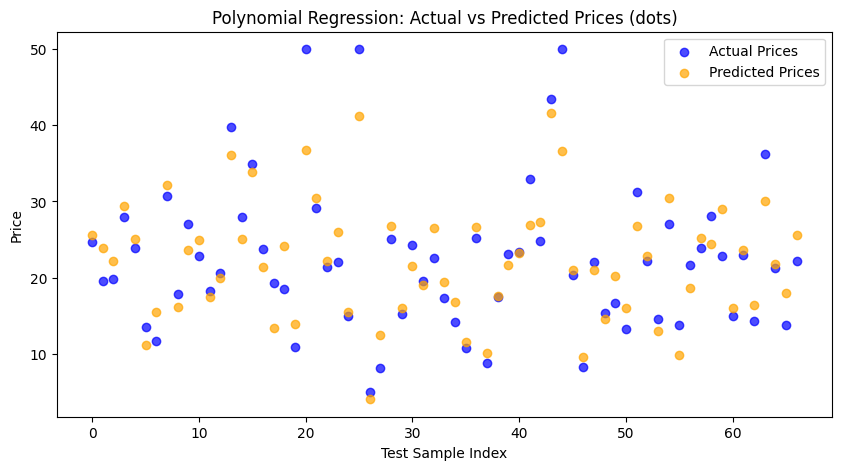

In [10]:

sgdr, X_test, y_test, y_test_pred = train_evaluate_polynomial_regression(x_train, y_train)
indices = np.arange(len(y_test))

plt.figure(figsize=(10,5))
plt.scatter(indices, y_test, color='blue', label='Actual Prices', alpha=0.7)
plt.scatter(indices, y_test_pred, color='orange', label='Predicted Prices', alpha=0.7)
plt.xlabel("Test Sample Index")
plt.ylabel("Price")
plt.title("Polynomial Regression: Actual vs Predicted Prices (dots)")
plt.legend()
plt.show()

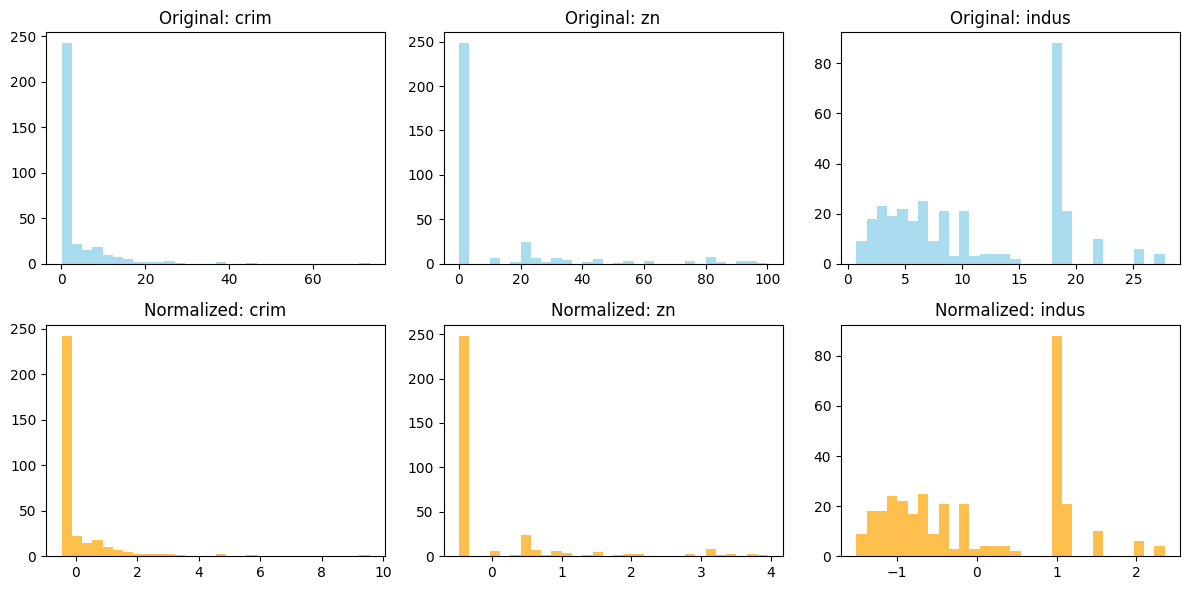

crim: mean before=3.36, std before=7.34
crim: mean after=0.00, std after=1.00
---
zn: mean before=10.69, std before=22.64
zn: mean after=-0.00, std after=1.00
---
indus: mean before=11.29, std before=6.99
indus: mean after=0.00, std after=1.00
---


In [11]:
x_norm, mean, sigma = zscore_normalize(x_train)

features_to_plot = [0, 1, 2] 
fig, axes = plt.subplots(2, len(features_to_plot), figsize=(12, 6))

for i, idx in enumerate(features_to_plot):
    axes[0, i].hist(x_train[:, idx], bins=30, color='skyblue', alpha=0.7)
    axes[0, i].set_title(f"Original: {keys[idx]}")
    axes[1, i].hist(x_norm[:, idx], bins=30, color='orange', alpha=0.7)
    axes[1, i].set_title(f"Normalized: {keys[idx]}")

plt.tight_layout()
plt.show()

for idx in features_to_plot:
    print(f"{keys[idx]}: mean before={x_train[:, idx].mean():.2f}, std before={x_train[:, idx].std():.2f}")
    print(f"{keys[idx]}: mean after={x_norm[:, idx].mean():.2f}, std after={x_norm[:, idx].std():.2f}")
    print("---")

\ZSCORE NORMALIZED TRAIN SET:
MSE: 22.729613831842936
RMSE: 4.767558477023951
MAE: 3.3048078212990313
\ZSCORE NORMALIZED TEST SET:
MSE: 22.908383719093422
RMSE: 4.786270334936527
MAE: 3.55389060866848


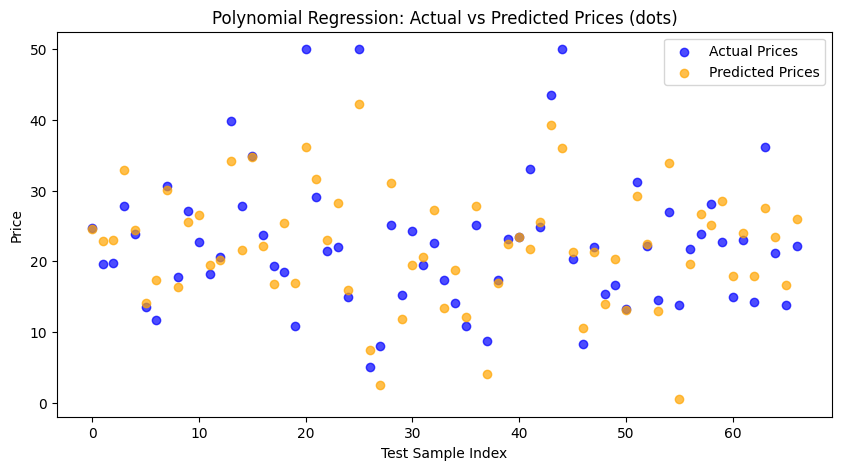

In [ ]:

sgdr, X_test, y_test, y_test_pred = train_evaluate_zscore_normalization(x_norm, y_train)
indices = np.arange(len(y_test))

plt.figure(figsize=(10,5))
plt.scatter(indices, y_test, color='blue', label='Actual Prices', alpha=0.7)
plt.scatter(indices, y_test_pred, color='orange', label='Predicted Prices', alpha=0.7)
plt.xlabel("Test Sample Index")
plt.ylabel("Price")
plt.title("Z-Score Normalization: Actual vs Predicted Prices (dots)")
plt.legend()
plt.show()